# The Iris Dataset
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The dataset contains a set of 150 records under five attributes - petal length, petal width, sepal length, sepal width and species.

### Specifying the TensorFlow version
Running `import tensorflow` will import the default version (currently 1.x). You can use 2.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [0]:
%tensorflow_version 2.x

### Import TensorFlow
Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


### Set random seed

In [0]:
tf.random.set_seed(42)

## Question 1

### Import dataset
- Import iris dataset
- Import the dataset using sklearn library

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(11,9)})

import warnings
warnings.filterwarnings('ignore')

In [0]:
#import io
#from google.colab import files
#uploaded = files.upload()

In [0]:
iris_df = pd.read_csv('iris.csv', index_col=0)

In [0]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 152
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 7.1+ KB


In [0]:
iris_df.shape

(152, 5)

In [0]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.3,1.30,1.8,2.5


In [0]:
pd.isnull(iris_df).count()

SepalLengthCm    152
SepalWidthCm     152
PetalLengthCm    152
PetalWidthCm     152
Species          152
dtype: int64

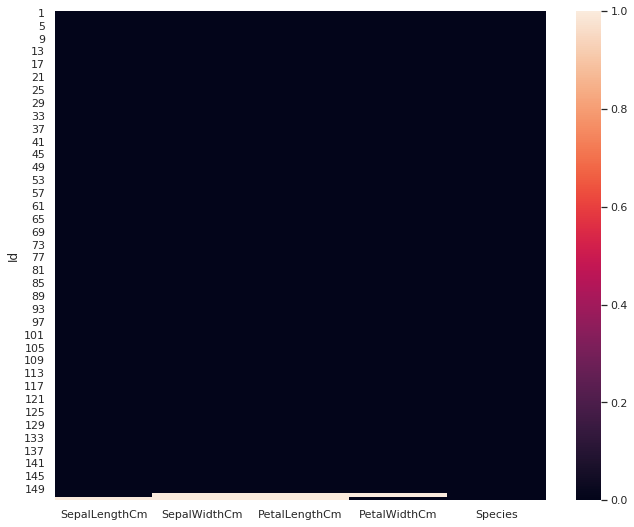

In [0]:
sns.heatmap(iris_df.isna())

In [0]:
### Observe NaN values in dataset

In [0]:
iris_df.dropna(inplace=True)

In [0]:
iris_df.shape

(150, 5)

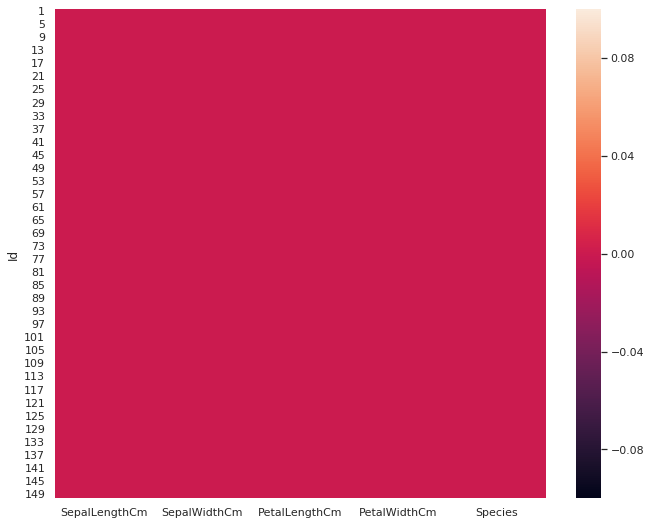

In [0]:
sns.heatmap(iris_df.isna())

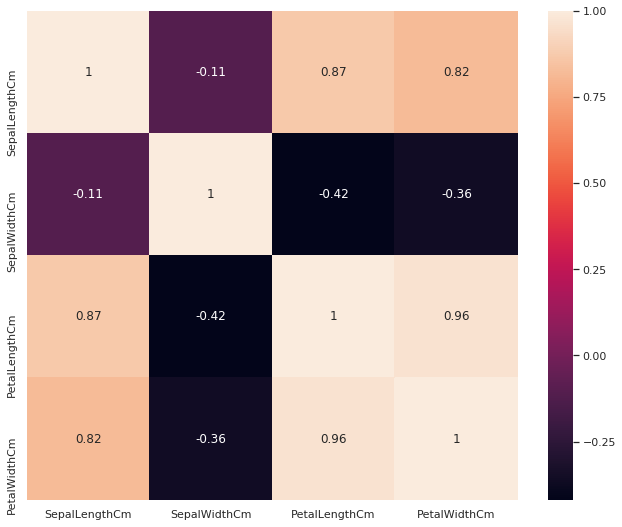

In [0]:
sns.heatmap(iris_df.corr(), annot=True)

In [0]:
### PetalWidthCm is highly correlated with other features

In [0]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2

### Get features and label from the dataset in separate variable
- you can get the features using .data method
- you can get the features using .target method

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()

In [0]:
X=iris.data

In [0]:
print(X.shape)
print(X[:5,])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
y=iris.target

In [0]:
print(y.shape)
print(y[:5,])

(150,)
[0 0 0 0 0]


In [0]:
#from sklearn.preprocessing import normalize

In [0]:
#X_normalized=normalize(X,axis=0)
#print("X_normalised\n",X_normalized[:5])

## Question 3

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
print(X_train.shape, '\n', y_train.shape)

(112, 4) 
 (112,)


In [0]:
print(X_test.shape, '\n', y_test.shape)

(38, 4) 
 (38,)


## Question 4

### One-hot encode the labels
- convert class vectors (integers) to binary class matrix
- convert labels
- number of classes: 3
- we are doing this to use categorical_crossentropy as loss

In [0]:
y_train_enc=tf.keras.utils.to_categorical(y_train, num_classes=3)

In [0]:
y_test_enc=tf.keras.utils.to_categorical(y_test, num_classes=3)

In [0]:
print("Shape of y_train",y_train_enc.shape)
print("Shape of y_test",y_test_enc.shape)

Shape of y_train (112, 3)
Shape of y_test (38, 3)


## Question 5

### Initialize a sequential model
- Define a sequential model

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
model = Sequential()

## Question 6

### Add a layer
- Use Dense Layer  with input shape of 4 (according to the feature set) and number of outputs set to 3
- Apply Softmax on Dense Layer outputs

In [0]:
from tensorflow.keras.layers import Dense,Activation,Dropout 

In [0]:
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))

In [0]:
model.add(Dense(3,activation='softmax'))

## Question 7

### Compile the model
- Use SGD as Optimizer
- Use categorical_crossentropy as loss function
- Use accuracy as metrics

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Question 8

### Summarize the model
- Check model layers
- Understand number of trainable parameters

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- Give train data as training features and labels
- Epochs: 100
- Give validation data as testing features and labels

In [0]:
model.fit(X_train,y_train_enc,validation_data=(X_test,y_test_enc),batch_size=20,epochs=100,verbose=1)

Train on 112 samples, validate on 38 samples
Epoch 1/100
112/112 [==============================] - 0s 4ms/sample - loss: 1.0841 - accuracy: 0.3304 - val_loss: 0.9934 - val_accuracy: 0.5526
Epoch 2/100
112/112 [==============================] - 0s 590us/sample - loss: 0.9849 - accuracy: 0.5714 - val_loss: 0.9286 - val_accuracy: 0.6316
Epoch 3/100
112/112 [==============================] - 0s 535us/sample - loss: 0.8812 - accuracy: 0.7143 - val_loss: 0.8749 - val_accuracy: 0.6579
Epoch 4/100
112/112 [==============================] - 0s 654us/sample - loss: 0.8482 - accuracy: 0.6339 - val_loss: 0.8047 - val_accuracy: 0.6579
Epoch 5/100
112/112 [==============================] - 0s 547us/sample - loss: 0.7784 - accuracy: 0.6607 - val_loss: 0.7518 - val_accuracy: 0.6579
Epoch 6/100
112/112 [==============================] - 0s 586us/sample - loss: 0.7334 - accuracy: 0.7232 - val_loss: 0.7088 - val_accuracy: 0.6579
Epoch 7/100
112/112 [==============================] - 0s 557us/sample - lo

## Question 10

### Make predictions
- Predict labels on one row

In [0]:
score=model.evaluate(X_test,y_test_enc,verbose=1)
print(score)

38/38 [==============================] - 0s 304us/sample - loss: 0.0915 - accuracy: 1.0000
[0.0914755666530446, 1.0]


In [0]:
y_predict=model.predict(X_test)

In [0]:
y_predict[1]

array([0.00601101, 0.8275698 , 0.1664193 ], dtype=float32)

### Compare the prediction with actual label
- Print the same row as done in the previous step but of actual labels

In [0]:
y_test_enc[1]

array([0., 1., 0.], dtype=float32)

In [0]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


In [0]:
cr=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n',cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38





---



# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

### Specifying the TensorFlow version
Running `import tensorflow` will import the default version (currently 1.x). You can use 2.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


### Import TensorFlow
Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


### Set random seed

In [0]:
tf.random.set_seed(42)

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [0]:
# run this cell to upload file if you are using google colab
import io
#from google.colab import files
#uploaded = files.upload()

Saving prices.csv to prices.csv


In [0]:
prices_df = pd.read_csv('prices.csv')

In [20]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [0]:
prices_df.shape

(851264, 7)

In [0]:
prices_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,7.083699e+01,8.369588e+01,0.85,3.384000e+01,5.277000e+01,7.988000e+01,1.584440e+03
close,851264.0,7.085711e+01,8.368969e+01,0.86,3.385000e+01,5.280000e+01,7.989000e+01,1.578130e+03
low,851264.0,7.011841e+01,8.287729e+01,0.83,3.348000e+01,5.223000e+01,7.911000e+01,1.549940e+03
high,851264.0,7.154348e+01,8.446550e+01,0.88,3.419000e+01,5.331000e+01,8.061000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


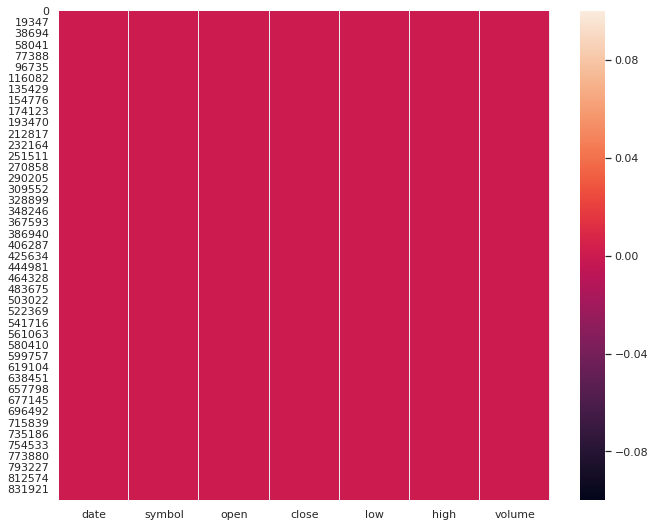

In [0]:
sns.heatmap(prices_df.isna())

In [22]:
prices_df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

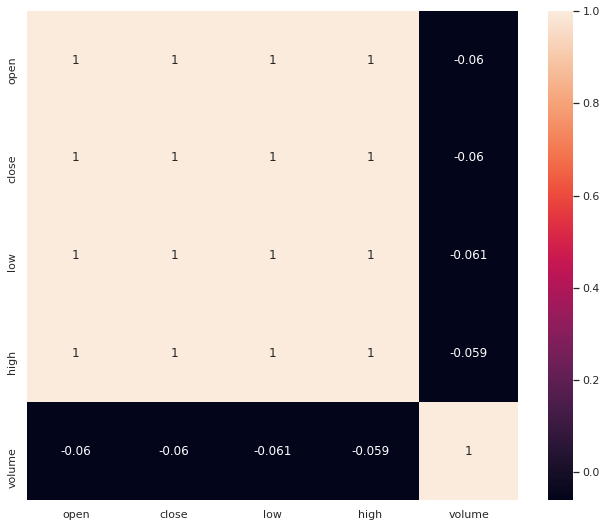

In [0]:
sns.heatmap(prices_df.corr(), annot=True)

In [0]:
prices_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop columnns
- drop "date" and "symbol" column from the data

In [0]:
prices_df.drop(['date', 'symbol'], axis=1, inplace=True)

In [26]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 5 columns):
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5)
memory usage: 32.5 MB


In [27]:
prices_df.shape

(851264, 5)

In [25]:
prices_df.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 3

### Take initial rows
- Take first 1000 rows from the data
- This step is done to make the execution faster

In [0]:
prices_new_df=prices_df.head(1000)

In [29]:
prices_new_df.shape

(1000, 5)

In [30]:
prices_new_df.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 4

### Get features and label from the dataset in separate variable
- Take "open", "close", "low", "high" columns as features
- Take "volume" column as label
- Normalize label column by dividing it with 1000000

In [0]:
prices_X=prices_new_df.copy()
prices_y=prices_X.pop('volume')

In [44]:
prices_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
open     1000 non-null float64
close    1000 non-null float64
low      1000 non-null float64
high     1000 non-null float64
dtypes: float64(4)
memory usage: 31.4 KB


In [45]:
prices_X.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [46]:
prices_y

0       2163600.0
1       2386400.0
2       2489500.0
3       2006300.0
4       1408600.0
          ...    
995     2133200.0
996     1982400.0
997    37152800.0
998     6568600.0
999     5604300.0
Name: volume, Length: 1000, dtype: float64

In [0]:
prices_y=prices_y/1000000

In [48]:
prices_y

0       2.1636
1       2.3864
2       2.4895
3       2.0063
4       1.4086
        ...   
995     2.1332
996     1.9824
997    37.1528
998     6.5686
999     5.6043
Name: volume, Length: 1000, dtype: float64

## Question 5

### Convert data
- Convert features and labels to numpy array
- Convert their data type to "float32"

In [0]:
prices_X=prices_X.to_numpy(dtype='float32')

In [50]:
prices_X

array([[123.43, 125.84, 122.31, 126.25],
       [125.24, 119.98, 119.94, 125.54],
       [116.38, 114.95, 114.93, 119.74],
       ...,
       [ 28.32,  28.77,  28.01,  28.81],
       [ 44.  ,  44.8 ,  43.75,  44.81],
       [ 36.08,  37.14,  36.01,  37.23]], dtype=float32)

In [0]:
prices_y=prices_y.to_numpy(dtype='float32')

In [57]:
prices_y[:10]

array([2.1636, 2.3864, 2.4895, 2.0063, 1.4086, 1.098 , 0.9496, 0.7853,
       1.0937, 1.5235], dtype=float32)

## Question 6

### Normalize data
- Normalize features
- Use tf.math.l2_normalize to normalize features
- You can read more about it here https://www.tensorflow.org/api_docs/python/tf/math/l2_normalize

In [59]:
prices_X

array([[123.43, 125.84, 122.31, 126.25],
       [125.24, 119.98, 119.94, 125.54],
       [116.38, 114.95, 114.93, 119.74],
       ...,
       [ 28.32,  28.77,  28.01,  28.81],
       [ 44.  ,  44.8 ,  43.75,  44.81],
       [ 36.08,  37.14,  36.01,  37.23]], dtype=float32)

In [0]:
prices_X=tf.keras.backend.l2_normalize(prices_X, axis=None)

In [62]:
prices_X

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[0.02202894, 0.02245906, 0.02182905, 0.02253223],
       [0.02235197, 0.02141321, 0.02140607, 0.02240551],
       [0.0207707 , 0.02051548, 0.02051192, 0.02137037],
       ...,
       [0.00505436, 0.00513467, 0.00499903, 0.00514181],
       [0.00785282, 0.0079956 , 0.0078082 , 0.00799738],
       [0.00643931, 0.00662849, 0.00642682, 0.00664455]], dtype=float32)>

## Question 7

### Define weight and bias
- Initialize weight and bias with tf.zeros
- tf.zeros is an initializer that generates tensors initialized to 0
- Specify the value for shape

In [0]:
W = tf.zeros(shape=(4, 1))
b = tf.zeros(shape=(1))

In [64]:
W

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [65]:
b

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

## Question 8

### Get prediction
- Define a function to get prediction
- Approach: prediction = (X * W) + b; here is X is features

In [0]:
@tf.function
def prediction(features, W, b):
       y_pred = tf.add(tf.matmul(features, W), b) 
       return y_pred 

### Calculate loss
- Calculate loss using predictions
- Define a function to calculate loss
- We are calculating mean squared error

In [0]:
@tf.function
def loss(y_actual, y_predicted):
      diff = y_actual - y_predicted 
      sqr = tf.square(diff)
      avg = tf.reduce_mean(sqr) 
      return avg 

## Question 9

### Define a function to train the model
1.   Record all the mathematical steps to calculate Loss
2.   Calculate Gradients of Loss w.r.t weights and bias
3.   Update Weights and Bias based on gradients and learning rate to minimize loss

In [0]:
def train(x, y_actual, w, b, learning_rate=0.01):
          # Record mathematical operations on 'tape' to calculate loss
          with tf.GradientTape() as t:
                 t.watch([w,b])
                 current_prediction = prediction(x, w, b) 
                 current_loss = loss(y_actual, current_prediction) 
                  
          # Calculate Gradients for Loss with respect to Weights and Bias
          dw, db = t.gradient(current_loss,[w, b])  
           
          # Update Weights and Bias
          w = w - learning_rate * dw
          b = b - learning_rate * db
    
          return w, b

## Question 10

### Train the model for 100 epochs 
- Observe the training loss at every iteration

In [69]:
for i in range(100):    
    W, b = train(prices_X, prices_y, W, b)
    print('Current Training Loss on iteration', i, loss(prices_y, prediction(prices_X, W, b)).numpy())


Current Training Loss on iteration 0 236.16759
Current Training Loss on iteration 1 235.09299
Current Training Loss on iteration 2 234.06102
Current Training Loss on iteration 3 233.06998
Current Training Loss on iteration 4 232.11781
Current Training Loss on iteration 5 231.20381
Current Training Loss on iteration 6 230.32585
Current Training Loss on iteration 7 229.48265
Current Training Loss on iteration 8 228.67297
Current Training Loss on iteration 9 227.89539
Current Training Loss on iteration 10 227.14832
Current Training Loss on iteration 11 226.43114
Current Training Loss on iteration 12 225.74234
Current Training Loss on iteration 13 225.0808
Current Training Loss on iteration 14 224.44553
Current Training Loss on iteration 15 223.835
Current Training Loss on iteration 16 223.24931
Current Training Loss on iteration 17 222.68655
Current Training Loss on iteration 18 222.14595
Current Training Loss on iteration 19 221.62688
Current Training Loss on iteration 20 221.12842
Curre

### Observe values of Weight
- Print the updated values

In [70]:
W

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.0547828 ],
       [0.05488191],
       [0.05422735],
       [0.05533117]], dtype=float32)>

### Observe values of Bias
- Print the updated values

In [71]:
b

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.607657], dtype=float32)>